### Student Information
Name:陳冠達

Student ID: 110137504

GitHub ID: AdaChen445

Kaggle name: Kuan-Dar, Chen

Kaggle private scoreboard snapshot:

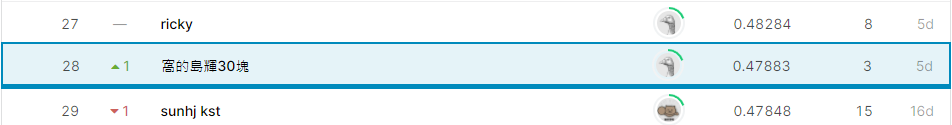

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [4]:
### some data preparation
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

Text(0.5, 0.98, 'Top 30 words in test')

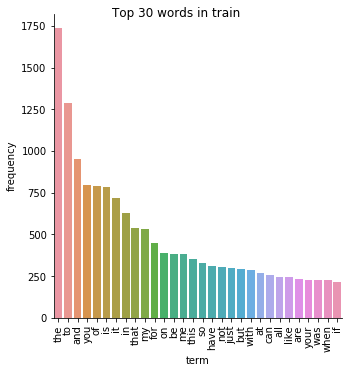

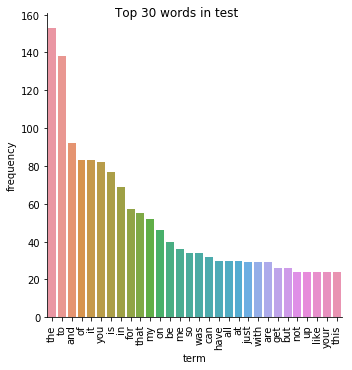

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

cv_tr = CountVectorizer() # train
cv_te = CountVectorizer() # test

tf_tr = cv_tr.fit_transform(train_df['text'])
tf_te = cv_te.fit_transform(test_df['text'])

top30tf_tr = pd.DataFrame(data={'term':cv_tr.get_feature_names_out(),'frequency':tf_tr.toarray().sum(axis=0)})
top30tf_tr.sort_values(by='frequency', ascending=False, inplace=True)
top30tf_te = pd.DataFrame(data={'term':cv_te.get_feature_names_out(),'frequency':tf_te.toarray().sum(axis=0)})
top30tf_te.sort_values(by='frequency', ascending=False, inplace=True)

top30tf_tr = top30tf_tr[:30]
top30tf_te = top30tf_te[:30]

g = sns.catplot(x='term', y='frequency', kind='bar', data=top30tf_tr)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Top 30 words in train')

h = sns.catplot(x='term', y='frequency', kind='bar', data=top30tf_te)
h.set_xticklabels(rotation=90)
h.fig.suptitle('Top 30 words in test')

### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [59]:
import nltk
# nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 
tfidf_vectorizer.fit(train_df['text'])
tfidf_feature = tfidf_vectorizer.transform(train_df['text'])

print(tfidf_vectorizer.get_feature_names()[100:110])

C:\Users\Jerry\anaconda3\envs\delta\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday', 'be']


C:\Users\Jerry\anaconda3\envs\delta\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [60]:
# The diagonal values are true predictions , which means the predicted label equals to the true label.
# While the others are false predictions, which means the predicted label didn't meet the true label.

### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb = nb.predict(X_test)

acc_train_nb = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)

print('training accuracy: {}'.format(round(acc_train_nb, 2)))
print('testing accuracy: {}'.format(round(acc_test_nb, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred_nb))
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb))

C:\Users\Jerry\anaconda3\envs\delta\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


### ** >>> Exercise 5 (Take home): **  
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [37]:
DT_model = DecisionTreeClassifier(random_state=0)
DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

print("confusion matrix & accuracy of DT")
print("train acc: " + str(accuracy_score(y_true=y_train, y_pred=y_train_pred)))
print("test acc: " + str(accuracy_score(y_true=y_test, y_pred=y_test_pred)))
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))
print(" ")
print("confusion matrix & accuracy of NB")
print("train acc: " + str(accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)))
print("test acc: " + str(accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)))
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb))


confusion matrix & accuracy of DT
train acc: 0.9858843066703571
test acc: 0.6570605187319885
[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]
 
confusion matrix & accuracy of NB
train acc: 0.7871574868530308
test acc: 0.6974063400576369
[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


In [61]:
# though the train accuracy of dicision-tree is better than naive-bayes', 
# the test accuracy shows that naive-bayes perform than dicision-tree
# also the true prediction of NB(242) is more than DT's(228)

### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

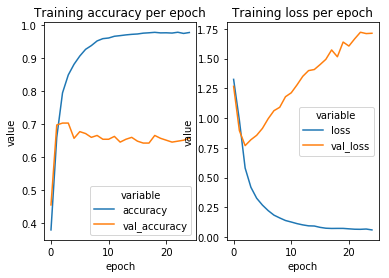

In [41]:
training_log = pd.read_csv("./training_log.csv")
plt.subplot(1,2,1)
plt.title('Training accuracy per epoch')
sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(training_log[['epoch','accuracy','val_accuracy']], ['epoch']))

plt.subplot(1,2,2)
plt.title('Training loss per epoch')
sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(training_log[['epoch','loss','val_loss']], ['epoch']))


In [62]:
# the training accuracy plot show that although the train accuracy keep getting higher and eventually reach alost 1,
# the val_accuracy stop increasing after about 4 epochs
# also in the training loss plot, the val_loss starting to increase after 4 epochs,
# indicates that epoch #4 is the point that split under-fitting and over-fitting,
# when training epoch under #4 is under-fitting and beyond #4 is over-fitting

### ** >>> Exercise 7 (Take home): **  
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

In [63]:
# Since words are basic elements in languages, knowing the meaning of each word and the relationship between words in text is important
# The objective of using word vectors is looking for the transitional probabilities between words, which is the likelihood words co-occur

# Word vectors can show distributed numerical representations of word features, and measure similarities by using cosine similarity
# no similarity is expressed as a 90 degree angle, while total similarity of 1 is a 0 degree angle
# than we can group the vectors of similar words together in vectorspace


### ** >>> Exercise 8 (Take home): **  
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

C:\Users\Jerry\anaconda3\envs\delta\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\Jerry\anaconda3\envs\delta\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\Jerry\anaconda3\envs\delta\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


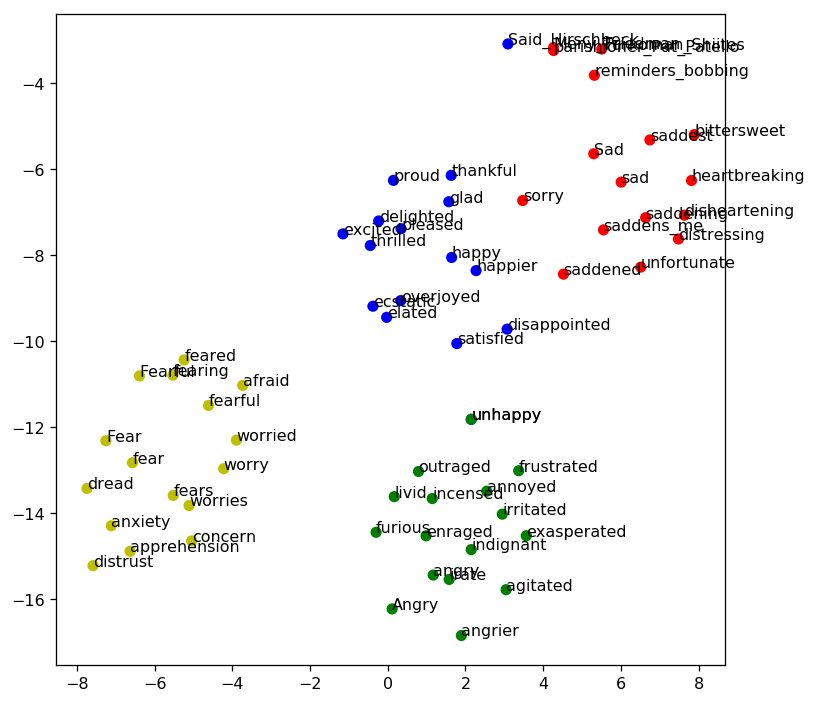

In [58]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## prepare training word vectors
size = 100
target_size = len(target_words)
all_word = list(w2v_google_model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Report of Kaggle Competition
In this Kaggle competition, i use glove_200dimension as feature extractor, LSTM as the ML model.

The final train accuracy perform an average of 0.6, the F1-score of test result perform an average of 0.48

#### Data Preprocessing

In [2]:
import pandas as pd
raw_data = pd.read_json('./tweets_DM.json',orient='column',lines=True)

#extract useful parts from raw data
data_df = pd.DataFrame(columns = ['tweet_id','text','hashtags'])
data_df['tweet_id'] = pd.json_normalize(raw_data['_source'])['tweet.tweet_id']
data_df['text'] = pd.json_normalize(raw_data['_source'])['tweet.text']
data_df['hashtags'] = pd.json_normalize(raw_data['_source'])['tweet.hashtags']

In [3]:
#import and merge ID and emotion data
id_df = pd.read_csv('data_identification.csv')
emotion_df = pd.read_csv('emotion.csv')

merge_df = data_df.merge(id_df,how='outer',on='tweet_id')
merge_df = merge_df.merge(emotion_df,how='outer',on='tweet_id')

In [4]:
import gensim
import re
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
import string

def preprocess_tweet(tweet):
    # convert string into unicode
    text = gensim.utils.any2unicode(tweet)
    # remove URL's
    text = re.sub(r'https?://[^ ]+', '', text)
    text = re.sub(r'www.[^ ]+', '', text)
    # remove hashtags
    text = re.sub('#', ' ', text)
    # remove duplicate whitespaces
    text = re.sub(r'\s+', ' ', text)
    # initialize lemmatizer and tokenizer
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokenizer = nltk.tokenize.casual.TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    # lemmatize and tokenize words
    text = [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text)]
    # remove individual punctuation (but not emoticons)
    return [word for word in text if word not in set(string.punctuation)]

merge_df['clean_text'] = merge_df['text'].apply(lambda x: preprocess_tweet(x)) # Tokenized clean text
merge_df['clean_sent'] = merge_df['clean_text'].apply(lambda x: ' '.join(x)) # Clean text in string format

#### Feature Extraction

In [5]:
df = merge_df
MAXLEN = max(df['clean_text'].apply(lambda d: len(d)))

# Convert tokenized text into sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(df['clean_sent'])
df['clean_tokseq'] = tokenizer.texts_to_sequences(df['clean_sent'])
df['clean_tokseq'] = list(pad_sequences(df['clean_tokseq'], maxlen = MAXLEN+10, padding='post'))

VOCABSIZE = max([max(sublist) for sublist in df['clean_tokseq'].values])+1

# Split data into training, validation and test data
train_df = df[df['identification']=='train'].drop(columns='identification')
test_df = df[df['identification']=='test'].drop(columns=['identification','emotion'])

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_df.drop('emotion', axis=1), train_df['emotion'], random_state=1)

# Convert output labels into one-hot encoded labels
import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_val)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

# Load GloVe model
glove_dir = 'glove.twitter.27B.200d.txt' # GloVe model for Twitter, 200 dimensions
embeddings_index = {}
f = open(glove_dir,encoding="utf-8")

for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

# Create GloVe embedding matrix
embedding_dim = 200
embedding_matrix = np.zeros((VOCABSIZE, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < VOCABSIZE:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Using TensorFlow backend.


Found 1193514 word vectors.


#### Model Building and Training

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, GlobalMaxPool1D

output_shape = len(label_encoder.classes_)

model = Sequential()
model.add(Embedding(VOCABSIZE, embedding_dim, weights=[embedding_matrix], input_length = MAXLEN+10))
model.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

batch_size = 512
model.fit(np.stack(x_train['clean_tokseq'].to_numpy(), axis=0), y_train, epochs = 2,
          batch_size=batch_size, 
          validation_data = (np.stack(x_val['clean_tokseq'].to_numpy(),axis=0), y_val),
          verbose = 1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 200)          106130000 
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 256)          336896    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [11]:
model.save("model.model", save_format="h5")

In [12]:
test_df['Res'] = label_decode(label_encoder, model.predict(np.stack(test_df['clean_tokseq'].to_numpy(),axis=0)))

out_Res = test_df[['tweet_id','Res']]
out_Res.columns = ['id','emotion']
finalname = 'model_3.csv'
out_Res.to_csv(finalname, index=False)